In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Outliers for Product_category columns

<Axes: xlabel='Product_Category'>

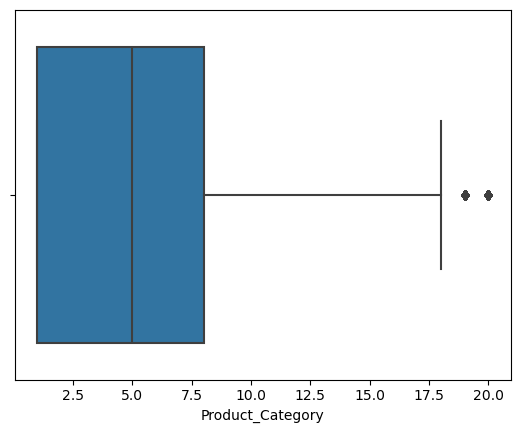

In [6]:
sns.boxplot(data = df, x = 'Product_Category')

In [7]:
Q1 = df['Product_Category'].quantile(0.25)
Q3 = df['Product_Category'].quantile(0.75)

IQR = Q3 - Q1
df[(df['Product_Category'] < (Q1 - 1.5*IQR)) | (df['Product_Category'] > (Q3+1.5*IQR))]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
545915,1000001,P00375436,F,0-17,10,A,2,0,20,612
545916,1000002,P00372445,M,55+,16,C,4+,0,20,119
545917,1000004,P00375436,M,46-50,7,B,2,1,20,481
545918,1000006,P00375436,F,51-55,9,A,1,0,20,480
545919,1000007,P00372445,M,36-45,1,B,1,1,20,241
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Outlier for Purchase amount

<Axes: xlabel='Purchase'>

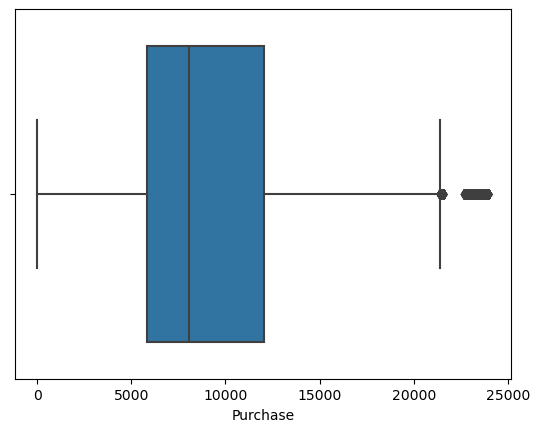

In [8]:
sns.boxplot(data = df, x = 'Purchase')

In [9]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)

IQR = Q3 - Q1
df[(df['Purchase'] < (Q1 - 1.5*IQR)) | (df['Purchase'] > (Q3+1.5*IQR))]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [10]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
bin = [0,5,10,15,20]
df['Product_Bin'] = pd.cut(df['Product_Category'], bins = bin)

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_Bin
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,"(0, 5]"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,"(0, 5]"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,"(10, 15]"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,"(10, 15]"
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,"(5, 10]"


<Axes: xlabel='Gender', ylabel='Purchase'>

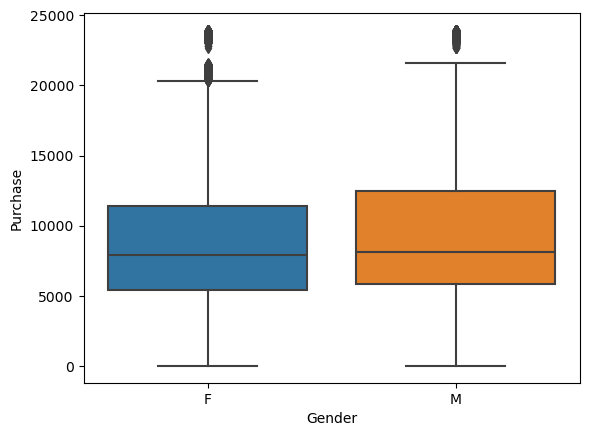

In [120]:
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

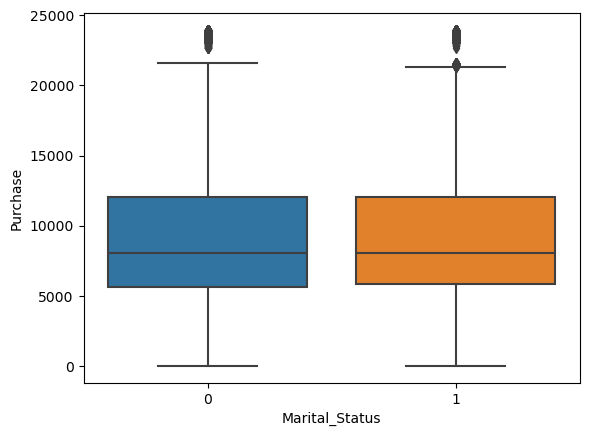

In [122]:
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase')

<Axes: xlabel='Age', ylabel='Purchase'>

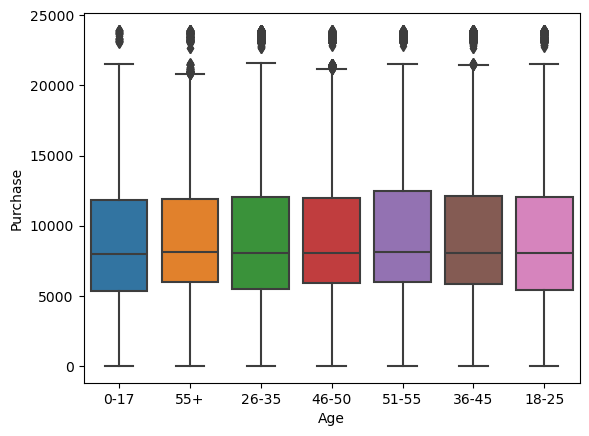

In [123]:
sns.boxplot(data = df, x = 'Age', y = 'Purchase')

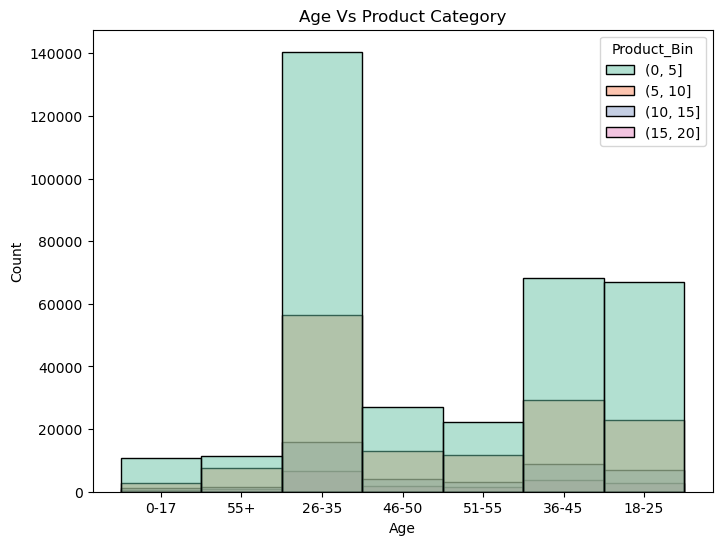

In [13]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x = 'Age', hue = 'Product_Bin', palette='Set2')
plt.title('Age Vs Product Category')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

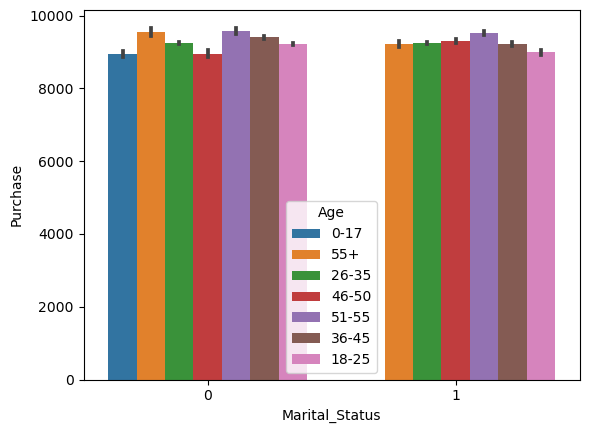

In [14]:
sns.barplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Age')

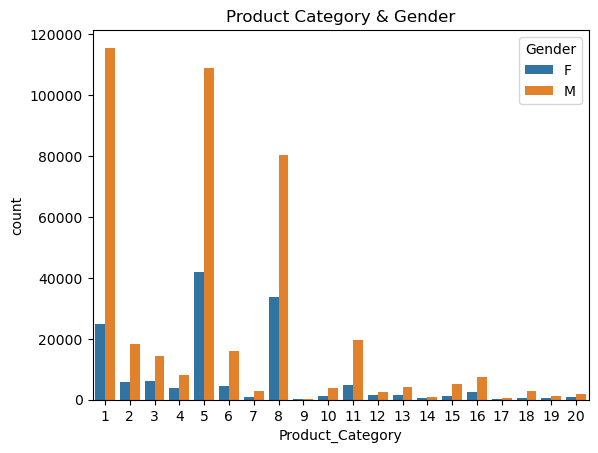

In [15]:
sns.countplot(data = df, x = 'Product_Category', hue = 'Gender')
plt.title('Product Category & Gender')
plt.show()

In [16]:
s = df[df['Gender'] == 'F']
female_mean = s['Purchase'].mean()
female_mean

8734.565765155476

In [17]:
female_std = s['Purchase'].std()
female_std

4767.233289291444

In [18]:
r = df[df['Gender'] == 'M']
male_mean = r['Purchase'].mean()
male_mean

9437.526040472265

In [19]:
male_std = r['Purchase'].std()
male_std

5092.186209777949

- The Average purchase order of Male is greater than female

<Axes: xlabel='Purchase', ylabel='Count'>

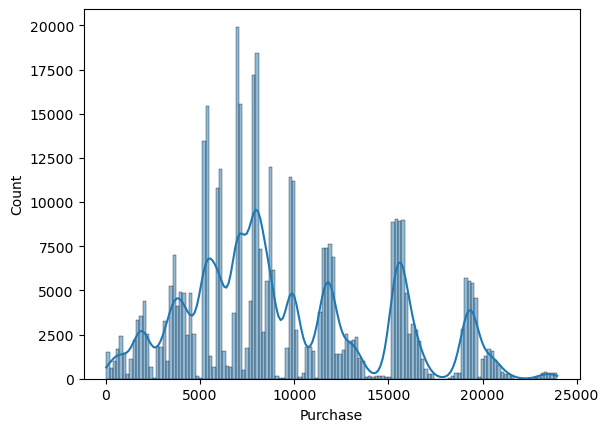

In [20]:
sns.histplot(data = r, x = 'Purchase', kde = True)

In [143]:
norm.ppf(0.025)

-1.9599639845400545

In [144]:
norm.ppf(0.975)

1.959963984540054

In [140]:
lower_range_male = male_mean - 1.95 * male_std
lower_range_male

-492.97444793366776

In [141]:
upper_range_male = male_mean + 1.95 * male_std
upper_range_male

19366.551770200334

<Axes: xlabel='Purchase', ylabel='Count'>

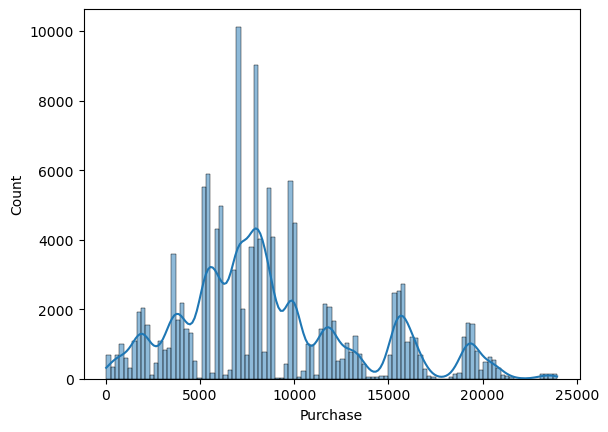

In [25]:
sns.histplot(data = s, x = 'Purchase', kde = True)

In [138]:
lower_range_female = female_mean - 1.95 * female_std
lower_range_female

-560.5468785183166

In [139]:
upper_range_female = female_mean + 1.95 * female_std
upper_range_female

18031.662949718317

## Confidence Interval for whole data Purchase and Gender column
### Consider Confidence level at 95%
- The average purchase value between the 95% of the data lies between the range 0 and 19366 for Male
- The average purchase value between the 95% of the data lies between the range 0 and 18031 for Female
- There is difference between the range of the Male and female average purchase value

### Sample size considering 300 for male

In [28]:
sam = [r['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

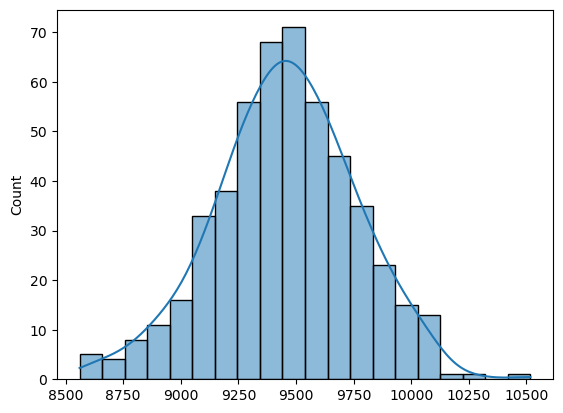

In [29]:
sns.histplot(x = sam, kde = True)

In [30]:
male_mean = np.mean(sam)
male_mean

9453.856746666666

In [31]:
se = male_std/np.sqrt(300)
se

293.9975078978999

In [136]:
lower_range_male = male_mean - 1.95 * se
lower_range_male

9379.459147093245

In [137]:
upper_range_male = male_mean + 1.95 * se
upper_range_male

9494.118175173424

### Sample size considering 300 for female

In [34]:
sam_f = [s['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

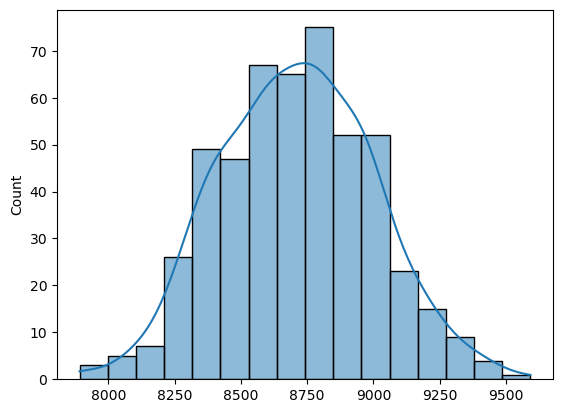

In [35]:
sns.histplot(x = sam_f, kde = True)

In [36]:
female_mean = np.mean(sam_f)
female_mean

8709.835406666667

In [37]:
se = female_std/np.sqrt(300)
se

275.236342286216

In [134]:
lower_range_female = female_mean - 1.95 * se
lower_range_female

8678.22852155991

In [135]:
upper_range_female = female_mean + 1.95 * se
upper_range_female

8792.887549640089

## Comparing the width of the confidence interval for sample size 300

- The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
- The average purchase value between the 95% of the data lies between the range 8678 and 8792 for Female
- The average purchase value of the Male is slightly greater than Female for the sample size of 300 

### Considering the Sample size 3000 for Male

In [40]:
sam_m = [r['Purchase'].sample(3000).mean() for i in range (500)]

<Axes: ylabel='Count'>

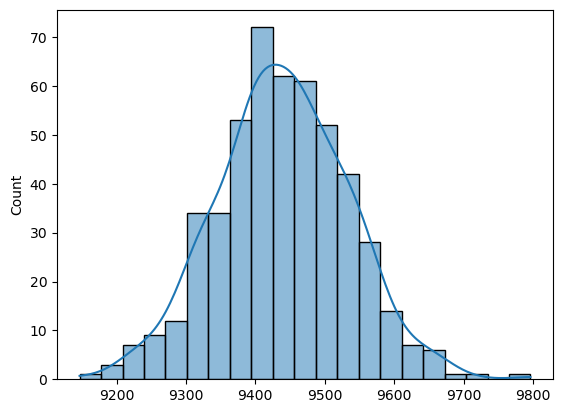

In [41]:
sns.histplot(x = sam_m, kde = True)

In [42]:
male_mean = np.mean(sam_m)
male_mean

9439.396187333334

In [43]:
se = male_std/np.sqrt(300)
se

293.9975078978999

In [132]:
lower_range_male = male_mean - 1.95 * se
lower_range_male

9379.459147093245

In [133]:
upper_range_male = male_mean + 1.95 * se
upper_range_male

9494.118175173424

### Considering the Sample size 3000 for female

In [46]:
sam_f = [s['Purchase'].sample(3000).mean() for i in range (500)]

<Axes: ylabel='Count'>

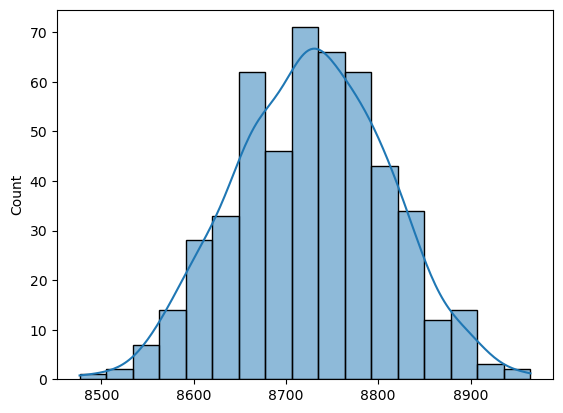

In [47]:
sns.histplot(x = sam_f, kde = True)

In [48]:
female_mean = np.mean(sam_f)
female_mean

8727.49192

In [49]:
se = female_std/np.sqrt(300)
se

275.236342286216

In [130]:
lower_range_female = female_mean - 1.95 * se
lower_range_female

8678.22852155991

In [131]:
upper_range_female = female_mean + 1.95 * se
upper_range_female

8792.887549640089

## Comparing the width of the confidence interval for sample size 3000

- The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
- The average purchase value between the 95% of the data lies between the range 8678 and 8792 for Female
- The average purchase value of the Male is greater than Female for the sample size of 3000 

### Considering Sample Size as 30000 for Male

In [52]:
sam_m = [r['Purchase'].sample(30000).mean() for i in range (500)]

<Axes: ylabel='Count'>

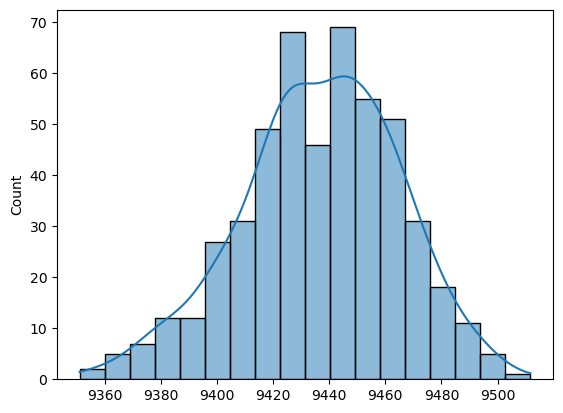

In [53]:
sns.histplot(x = sam_m, kde = True)

In [54]:
male_mean = np.mean(sam_m)
male_mean

9436.788661133334

In [129]:
se = male_std/np.sqrt(30000)
lower_range_male = male_mean - 1.95 * se
upper_range_male = male_mean + 1.95 * se
lower_range_male, upper_range_male

(9379.459147093245, 9494.118175173424)

### Considering Sample Size as 30000 for Female

In [56]:
sam_f = [s['Purchase'].sample(30000).mean() for i in range (500)]

<Axes: ylabel='Count'>

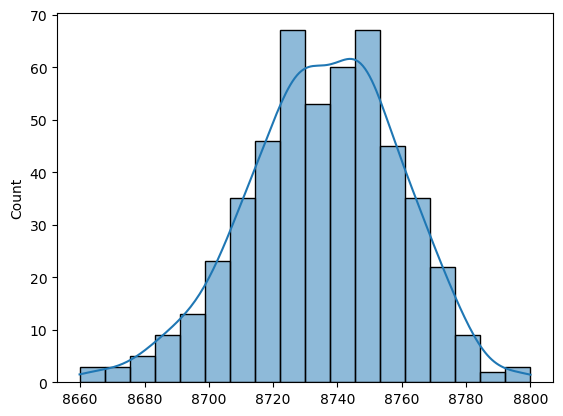

In [57]:
sns.histplot(x = sam_f, kde = True)

In [58]:
female_mean = np.mean(sam_f)
female_mean

8735.5580356

In [128]:
se = female_std/np.sqrt(30000)
lower_range_femmale = female_mean - 1.95 * se
upper_range_female = female_mean + 1.95 * se
lower_range_female, upper_range_female

(8276.104318650607, 8789.22912234581)

## Comparing the width of the confidence interval for sample size 30000

- The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
- The average purchase value between the 95% of the data lies between the range 8276 and 8789 for Female
- The average purchase value of the Male is greater than Female for the sample size of 30000 

## Confidence Interval for 300 Sample for  Purchase and Age column

In [75]:
age_0 = df[df['Age'] == '0-17']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

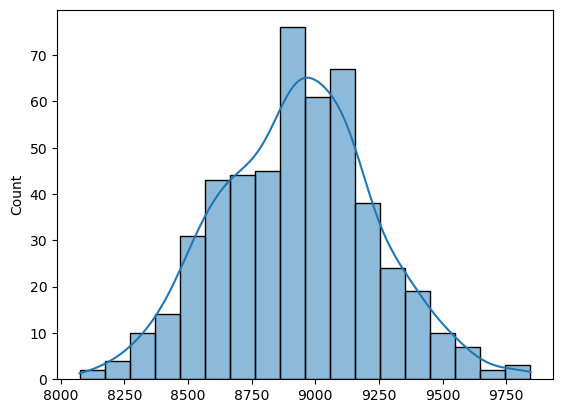

In [76]:
sns.histplot(x = age_s, kde = True)

In [77]:
norm.ppf(0.025)

-1.9599639845400545

In [78]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8338.728590068351, 9518.649436598318)

In [79]:
age_0 = df[df['Age'] == '18-25']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

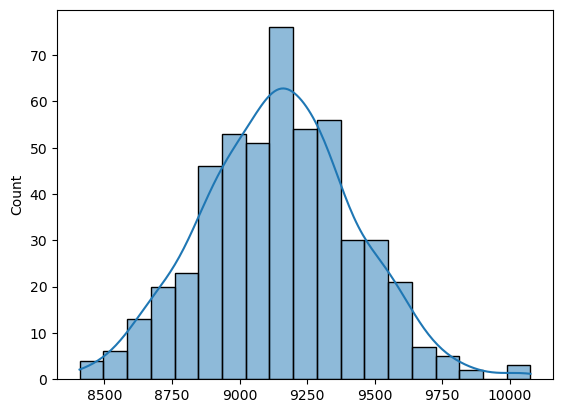

In [80]:
sns.histplot(x = age_s, kde = True)

In [81]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8601.521152852414, 9692.838113814256)

In [83]:
age_0 = df[df['Age'] == '26-35']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

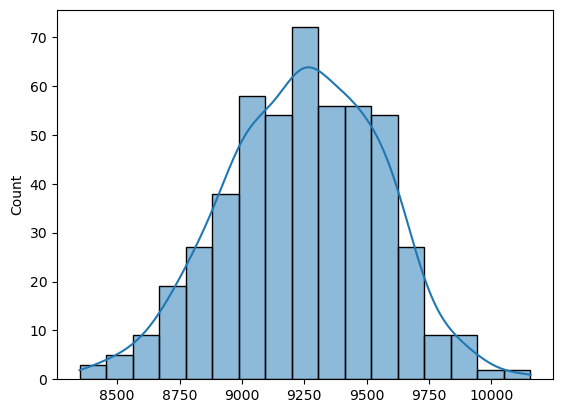

In [84]:
sns.histplot(x = age_s, kde = True)

In [85]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8644.988349661706, 9844.868397004959)

In [86]:
age_0 = df[df['Age'] == '36-45']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

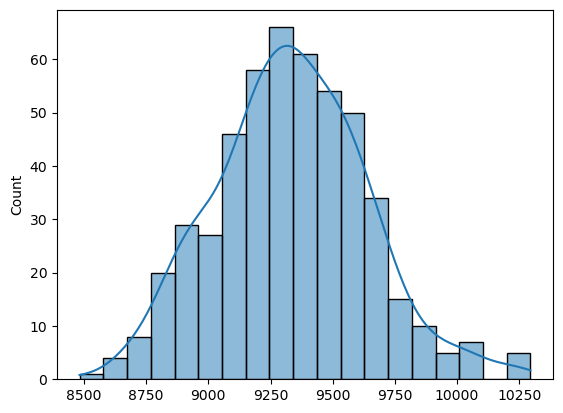

In [87]:
sns.histplot(x = age_s, kde = True)

In [88]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8741.166707468898, 9923.977212531105)

In [89]:
age_0 = df[df['Age'] == '46-50']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

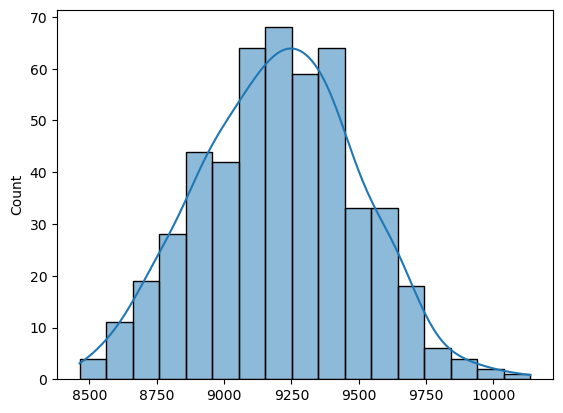

In [90]:
sns.histplot(x = age_s, kde = True)

In [91]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8635.692085877328, 9772.08558078934)

In [92]:
age_0 = df[df['Age'] == '51-55']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

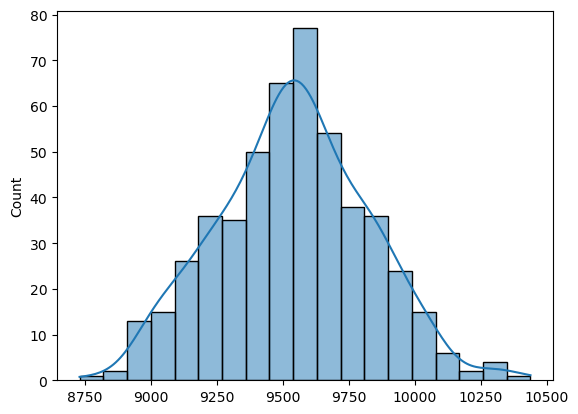

In [93]:
sns.histplot(x = age_s, kde = True)

In [94]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8985.281312953037, 10093.104780380298)

In [95]:
age_0 = df[df['Age'] == '55+']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

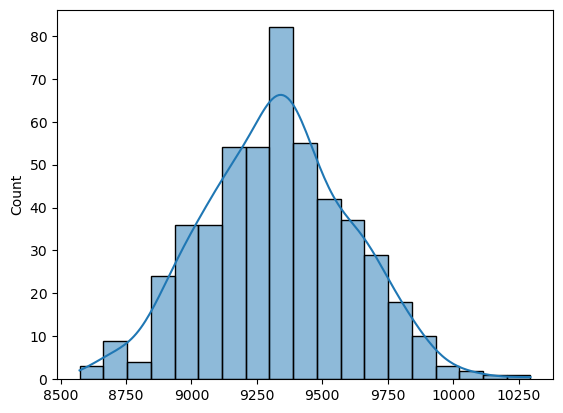

In [96]:
sns.histplot(x = age_s, kde = True)

In [97]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8784.999301765343, 9871.033684901322)

- For age 0-17 confidence interval of means: (8338, 9158)
- For age 18-25 confidence interval of means: (8601, 9692)
- For age 26-35 confidence interval of means: (8644, 9844)
- For age 36-45 confidence interval of means: (8741, 9923)
- For age 46-50 confidence interval of means: (8635, 9772)
- For age 51-55 confidence interval of means: (8985, 10093)
- For age 55+ confidence interval of means: (8784, 9871)

## Confidence Interval  for  Purchase and Marital Status column

In [98]:
m1= df[df['Marital_Status'] == 1]
m1_mean = m1['Purchase'].mean()
m1_mean

9261.174574082374

In [99]:
m1_std = m1['Purchase'].std()
m1_std

5016.89737779313

In [100]:
m0= df[df['Marital_Status'] == 0]
m0_mean = m0['Purchase'].mean()
m0_mean

9265.907618921507

In [101]:
m0_std = m0['Purchase'].std()
m0_std

5027.347858674457

<Axes: xlabel='Purchase', ylabel='Count'>

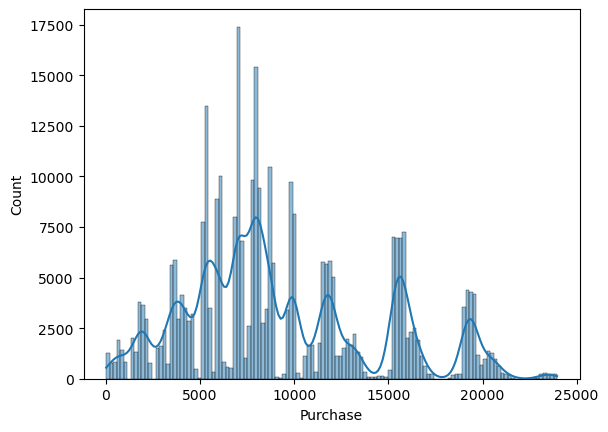

In [102]:
sns.histplot(data = m0, x = 'Purchase', kde = True)

In [103]:
lower_range_m0 = m0_mean - 1.64 * m0_std
upper_range_m0 = m0_mean + 1.64 * m0_std
(lower_range_m0,upper_range_m0)

(1021.0571306953971, 17510.758107147616)

<Axes: xlabel='Purchase', ylabel='Count'>

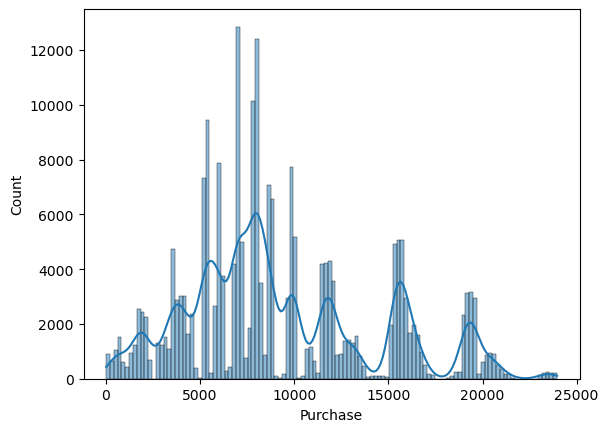

In [104]:
sns.histplot(data = m1, x = 'Purchase', kde = True)

In [105]:
lower_range_m1 = m1_mean - 1.64 * m1_std
upper_range_m1 = m1_mean + 1.64 * m1_std
(lower_range_m1,upper_range_m1)

(1033.4628745016416, 17488.886273663105)

## Confidence Interval for whole data
### Consider Confidence level at 95%
- The average purchase value between the 95% of the data lies between the range 1021 and 17510 for m0
- The average purchase value between the 95% of the data lies between the range 1033 and 17488 for m1
- There is difference between the range of the single and married average purchase value

### Sample size considering 300 for Married

In [106]:
sam_m1 = [m1['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

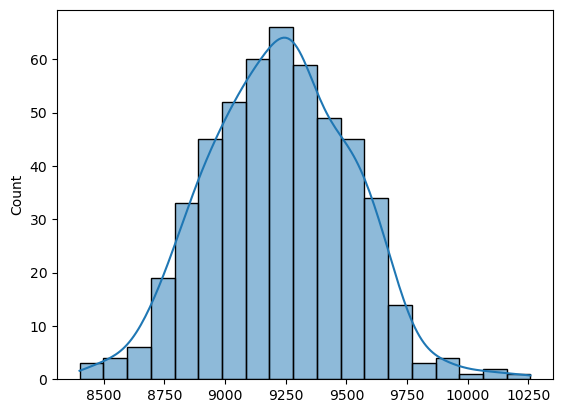

In [107]:
sns.histplot(x = sam_m1, kde = True)

In [127]:
m1_mean = np.mean(sam_m1)
se= m1_std/np.sqrt(300)
lower_range_m1 = m1_mean - 1.95 * se
upper_range_m1 = m1_mean + 1.95 * se
(lower_range_m1,upper_range_m1)

(8698.825140944708, 9828.46289105529)

### Sample size considering 300 for Not Married

In [109]:
sam_m0 = [m0['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

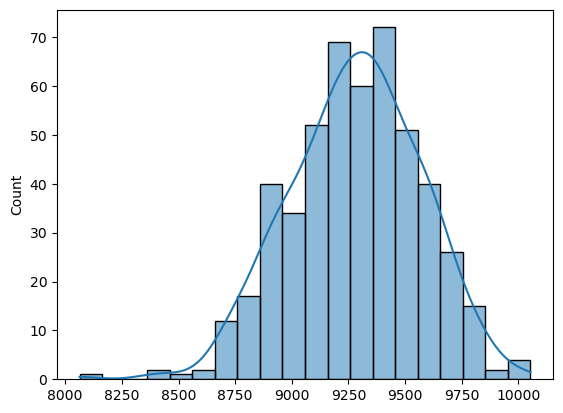

In [110]:
sns.histplot(x = sam_m0, kde = True)

In [126]:
m0_mean = np.mean(sam_m1)
se= m0_std/np.sqrt(300)
lower_range_m0 = m0_mean - 1.95 * se
upper_range_m0 = m0_mean + 1.95 * se
(lower_range_m0,upper_range_m0)

(8697.648591294459, 9829.639440705538)

## Comparing the width of the confidence interval for sample size 300

- The average purchase value between the 95% of the data lies between the range 8698 and 9828  for Married
- The average purchase value between the 95% of the data lies between the range 8697 and 9829 for Not married


### Sample size considering 3000 for Married

In [112]:
sam_m1 = [m1['Purchase'].sample(3000).mean() for i in range (500)]


<Axes: ylabel='Count'>

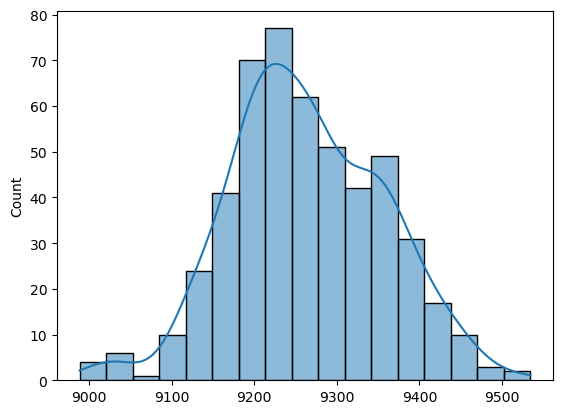

In [113]:
sns.histplot(x = sam_m1, kde = True)

In [125]:
m1_mean = np.mean(sam_m1)
se= m1_std/np.sqrt(300)
lower_range_m1 = m1_mean - 1.95 * se
upper_range_m1 = m1_mean + 1.95 * se
(lower_range_m1,upper_range_m1)

(8698.825140944708, 9828.46289105529)

### Sample size considering 3000 for Not Married

In [116]:
sam_m0 = [m0['Purchase'].sample(3000).mean() for i in range (500)]

<Axes: ylabel='Count'>

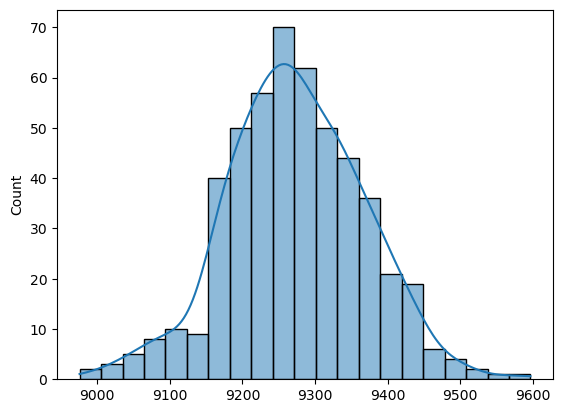

In [117]:
sns.histplot(x = sam_m0, kde = True)

In [124]:
m0_mean = np.mean(sam_m1)
se= m0_std/np.sqrt(300)
lower_range_m0 = m0_mean - 1.95 * se
upper_range_m0 = m0_mean + 1.95 * se
(lower_range_m0,upper_range_m0)

(8697.648591294459, 9829.639440705538)

## Comparing the width of the confidence interval for sample size 3000

- The average purchase value between the 95% of the data lies between the range 8698 and 9828 for Married
- The average purchase value between the 95% of the data lies between the range 8697 and 9829 for Not married

# Recommendations

- To increase sales, the company should implement strategies tailored to both genders, considering that men generally spend more. While targeting male customers, it's essential not to overlook females by offering discounts and special offers.
- since the age group of 51-55 demonstrates higher spending, allocating more resources to attract customers from other age brackets is crucial.
- Certain product categories, such as 19, 20, and 13, show minimal purchase activity. Considering dropping these categories could streamline inventory and resource allocation, optimizing overall operations
-  Moreover, the analysis reveals a significant frequency of purchase orders falling within the 5k to 10k range. Focusing efforts on promoting and enhancing the appeal of products within this mid-range price segment can potentially drive higher sales and revenue.

# Questions: 
- Are women spending more money per transaction than men? Why or Why not?
  - No the women are not spending more money than men
  - There may be various reason to this some of them must be :
   - Men must be earning greater than women
   - Quality of product for women is not good
   
- Confidence intervals and distribution of the mean of the expenses by female and male customers
  - At 95% confidence interval and sample of 30000
  - The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
  - The average purchase value between the 95% of the data lies between the range 8276 and 8789 for Female
  
- Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make       changes or improvements? 
  - No the average spending is not overlapping. But this can be change by add some female centric marketing it can be achievable
  
- Results when the same activity is performed for Married vs Unmarried (10 Points)
  - At 95% confidence interval and sample of 3000
  - The average purchase value between the 95% of the data lies between the range 8698 and 9828 for Married
  - The average purchase value between the 95% of the data lies between the range 8697 and 9829 for Not married
  
- Results when the same activity is performed for Age
   - At 95% confidence interval and sample of 300
   - For age 0-17 confidence interval of means: (8338, 9158)
   - For age 18-25 confidence interval of means: (8601, 9692)
   - For age 26-35 confidence interval of means: (8644, 9844)
   - For age 36-45 confidence interval of means: (8741, 9923)
   - For age 46-50 confidence interval of means: (8635, 9772)
   - For age 51-55 confidence interval of means: (8985, 10093)
   - For age 55+ confidence interval of means: (8784, 9871)